In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

In [2]:
df = pd.read_csv(r"C:\Users\batuh\OneDrive\Masaüstü\BATU_PROJECTS\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
def check_df(dataframe, head = 10):
    print("################# SHAPE ###############")
    print(dataframe.shape)
    print("################ TYPES ################")
    print(dataframe.dtypes)
    print("################ TAİL ##################")
    print(dataframe.tail(head))
    print("################ NA ###################")
    print(dataframe.isnull().sum())
    print("################ Quantiles ##############")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [5]:
check_df(df)

################# SHAPE ###############
(768, 9)
################ TYPES ################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
################ TAİL ##################
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
758            1      106             76              0        0  37.5                     0.197   26        0
759            6      190             92              0        0  35.5                     0.278   66        1
760            2       88             58             26       16  28.4                     0.766   22        0
761            9      170             74             31        0  44.0                  

In [6]:
def cleaning_data(df):
    for col in df.loc[:, df.dtypes == "object"]:
        df[col].fillna("Empty Values", inplace = True)
    
    for col in df.loc[:, df.dtypes == "int64"]:
        df[col].fillna(0, inplace = True)

    for col in df.loc[:, df.dtypes == "float64"]:
        df[col].fillna(0, inplace = True)
  
    for col in df.loc[:, df.dtypes == "object"]:
        df[col] = df[col].str.strip()
    
    for col in df.loc[:, df.dtypes == "category"]:
        df[col] = df[col].str.strip()

In [7]:
cleaning_data(df)

In [8]:
def arrange_the_data(df):
    df.columns = [col.upper() for col in df.columns]

    for col in df.loc[:, df.dtypes == "object"]:
        df[col] = df[col].str.upper()

    for col in df.loc[:, df.dtypes == "category"]:
        df[col] = df[col].str.upper()

In [9]:
arrange_the_data(df)

In [10]:
df["OUTCOME"] = df["OUTCOME"].astype("int64")

In [11]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["object","category"] and df[col].nunique() < 24]
num_cols = [col for col in df.columns if str(df[col].dtypes) in ["int64","float64"]]
num_but_cat = [col for col in df.columns if df[col].nunique() < 12 and str(df[col].dtypes) in ["int64","float64"]]
cat_but_car = [col for col in df.columns if df[col].nunique() > 24 and str(df[col].dtypes) in [["object","category"]]]
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [20]:
df[num_cols].head(10)

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [14]:
def graphs_for_numeric(df):
    for col in num_cols:
        print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        print(df[col].describe().T)
        print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        plt.grid(True)
        plt.hist(df[col])
        plt.title(col)
        plt.show()

In [15]:
def graps_for_correlasion(df, target):
    for col in num_cols:
        plt.grid(True)
        sns.regplot(x = df[col], y = df[target], data = df)
        plt.title(df[col].corr(df[target]))
        plt.show()

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: PREGNANCIES, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


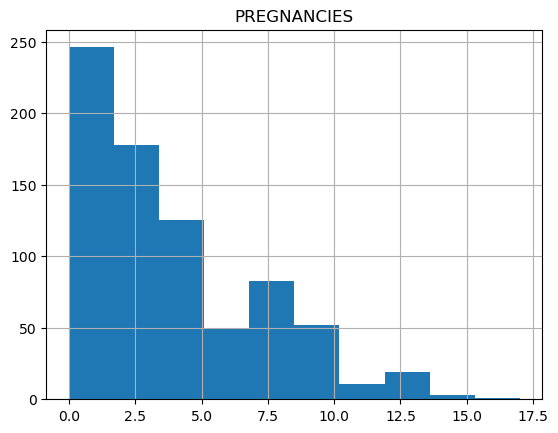

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: GLUCOSE, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


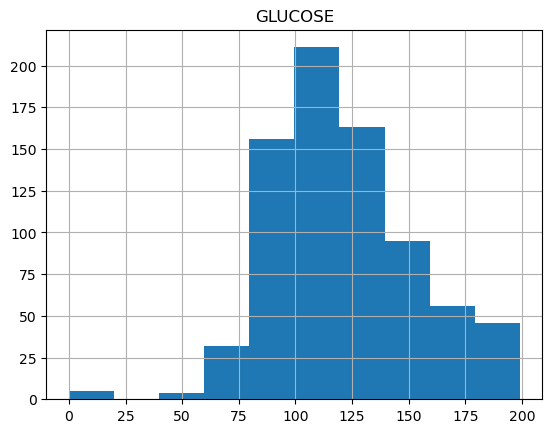

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BLOODPRESSURE, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


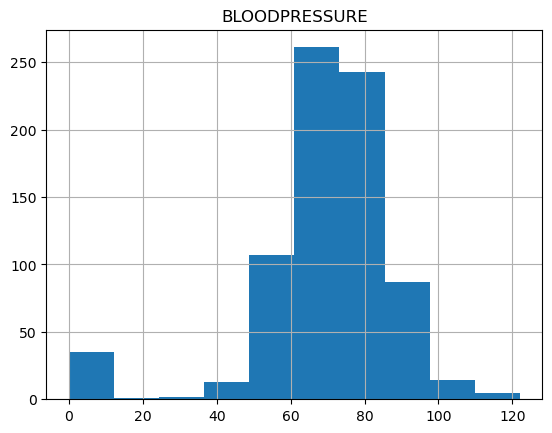

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SKINTHICKNESS, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


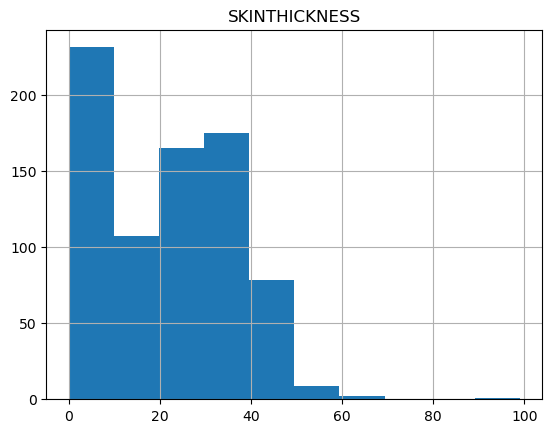

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: INSULIN, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


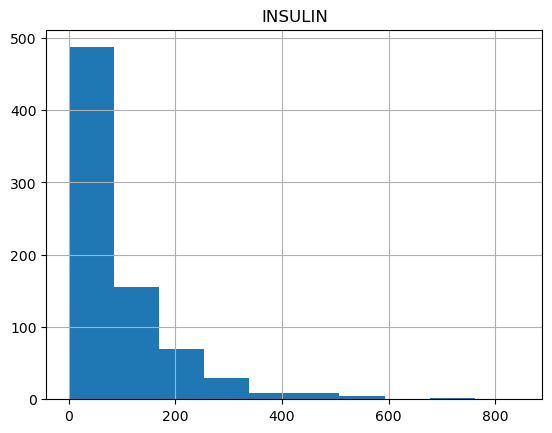

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


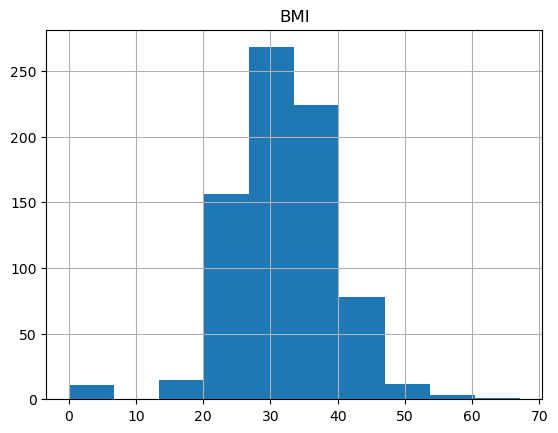

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DIABETESPEDIGREEFUNCTION, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


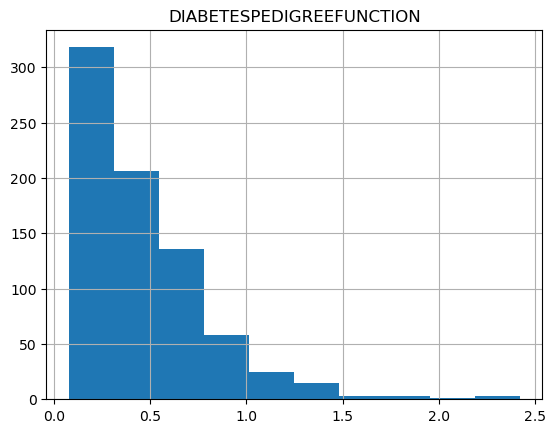

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: AGE, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


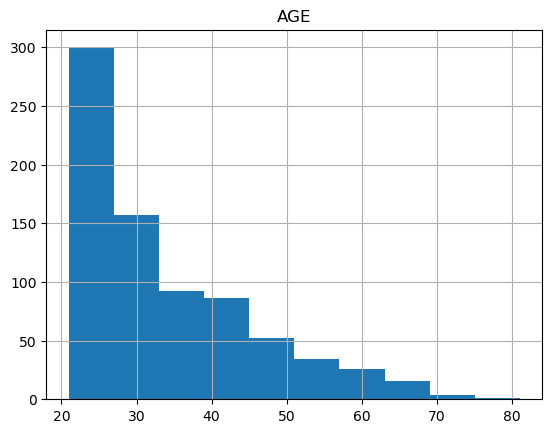

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: OUTCOME, dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


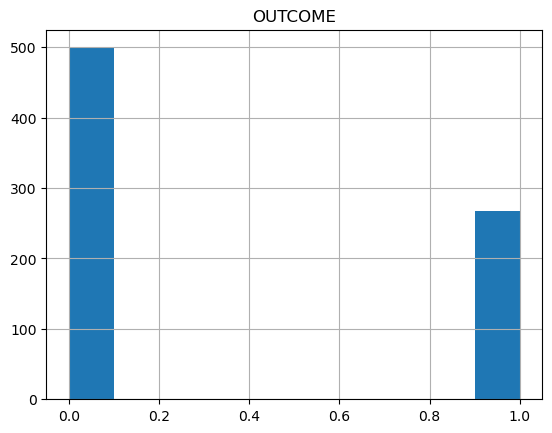

In [16]:
graphs_for_numeric(df)

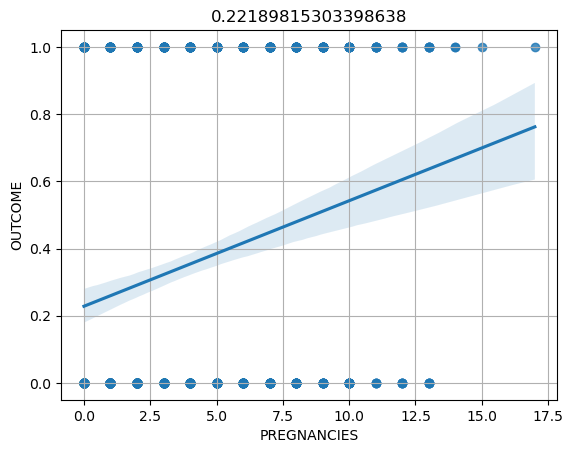

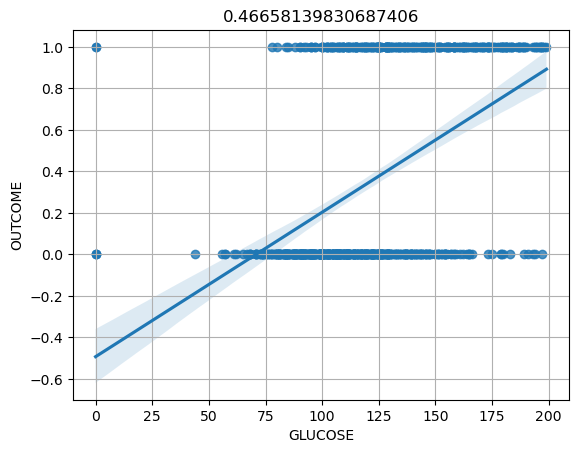

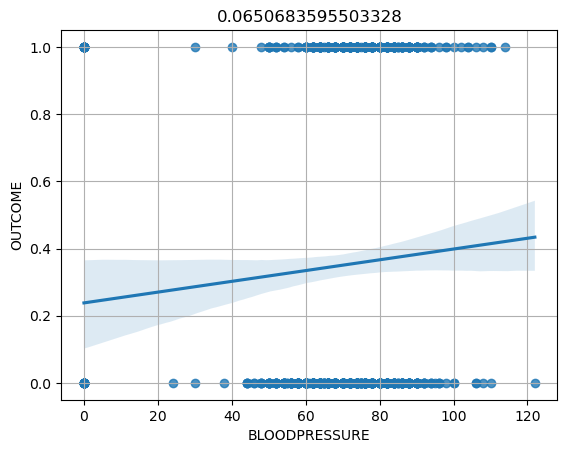

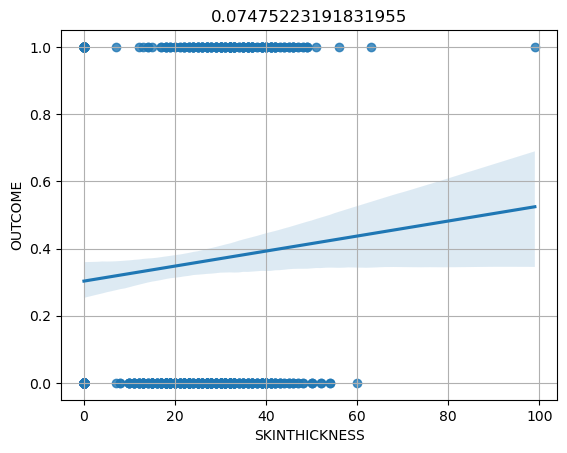

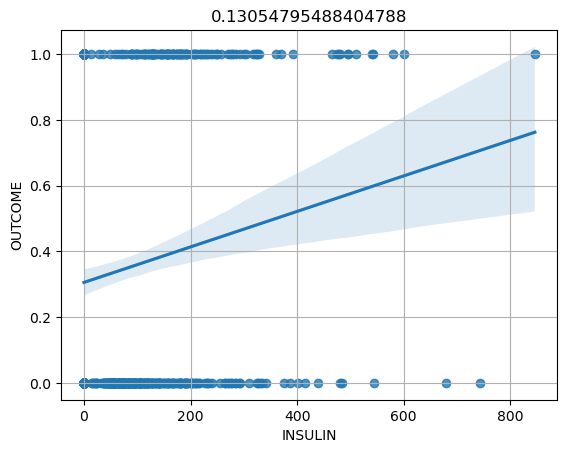

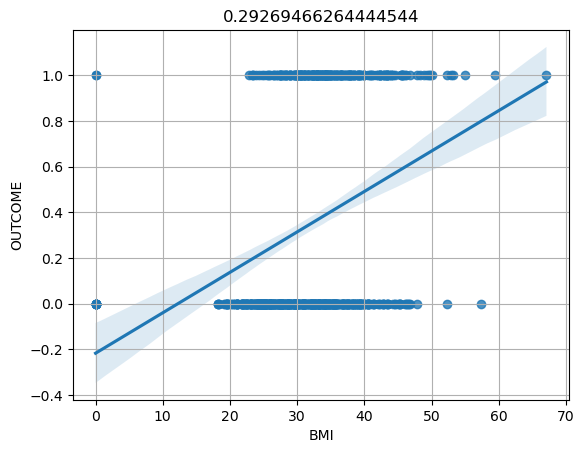

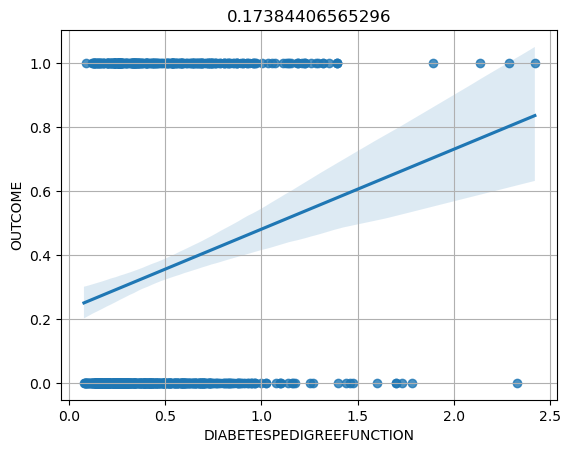

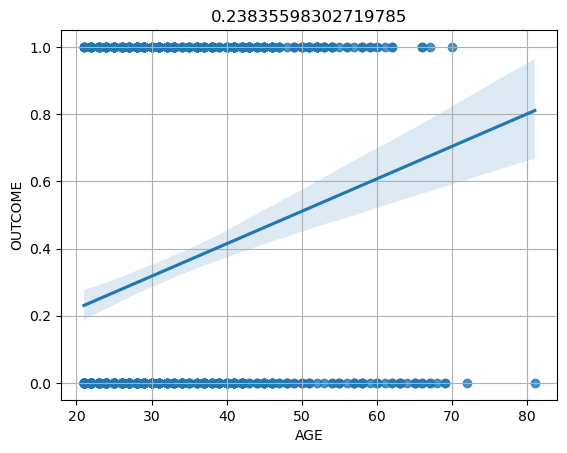

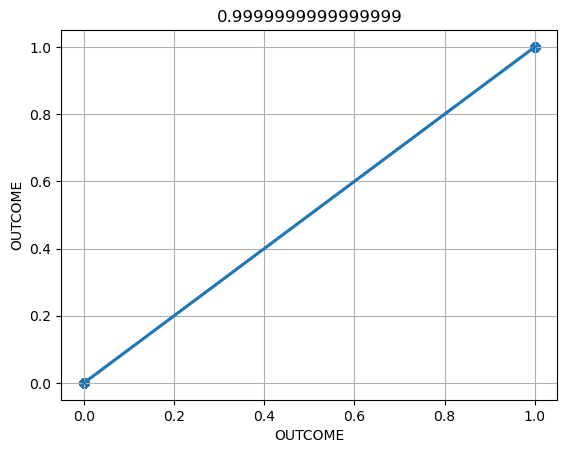

In [17]:
graps_for_correlasion(df= df, target= "OUTCOME")

In [18]:
def groups (df, target):
    for col in num_cols:
        print(df.pivot_table(target, col, aggfunc= ["count","mean","std"], sort = False))
        print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

In [21]:
df.dtypes

PREGNANCIES                   int64
GLUCOSE                       int64
BLOODPRESSURE                 int64
SKINTHICKNESS                 int64
INSULIN                       int64
BMI                         float64
DIABETESPEDIGREEFUNCTION    float64
AGE                           int64
OUTCOME                       int64
dtype: object

In [19]:
groups(df= df, target= "OUTCOME")

              count      mean       std
            OUTCOME   OUTCOME   OUTCOME
PREGNANCIES                            
6                50  0.320000  0.471212
1               135  0.214815  0.412223
8                38  0.578947  0.500355
0               111  0.342342  0.476645
5                57  0.368421  0.486664
3                75  0.360000  0.483232
10               24  0.416667  0.503610
2               103  0.184466  0.389760
4                68  0.338235  0.476627
7                45  0.555556  0.502519
9                28  0.642857  0.487950
11               11  0.636364  0.504525
13               10  0.500000  0.527046
15                1  1.000000       NaN
17                1  1.000000       NaN
12                9  0.444444  0.527046
14                2  1.000000  0.000000
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
          count      mean       std
        OUTCOME   OUTCOME   OUTCOME
GLUCOSE                          

ValueError: Grouper for 'OUTCOME' not 1-dimensional

In [ ]:
def graps_for_pie(df):
    for col in df.loc[:,df.nunique() < 15]:
        freq = df[col].value_counts()
        fig = plt.figure()
        plt.figure(figsize = (10,6))
        c = (["red","green","purple","blue","orange","grey","pink","gold",
        "brown","yellow","black","white"])
        plt.pie(freq, labels = freq.index, autopct="%1.1f%%", colors = c, shadow = True)
        plt.title(col)
        plt.show()

<Figure size 640x480 with 0 Axes>

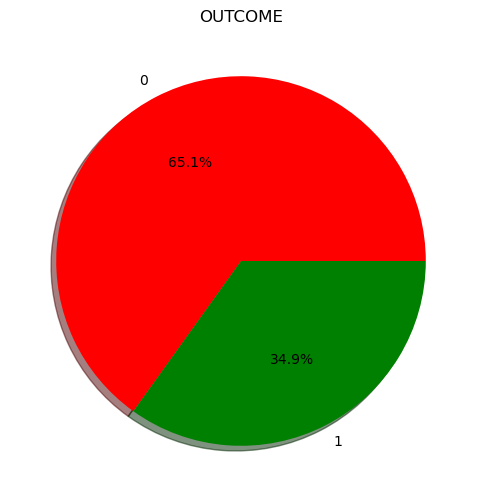

In [ ]:
graps_for_pie(df)